Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.9190.jpg', 'dog.10895.jpg', 'cat.3403.jpg', 'cat.630.jpg', 'dog.7147.jpg', 'cat.3512.jpg', 'cat.714.jpg', 'dog.4482.jpg', 'dog.7643.jpg', 'cat.12412.jpg', 'cat.10908.jpg', 'cat.8805.jpg', 'dog.6761.jpg', 'cat.7150.jpg', 'dog.807.jpg', 'cat.12495.jpg', 'cat.300.jpg', 'cat.10926.jpg', 'dog.12238.jpg', 'dog.7636.jpg', 'dog.6847.jpg', 'dog.12492.jpg', 'dog.628.jpg', 'dog.6930.jpg', 'cat.12135.jpg', 'cat.1315.jpg', 'dog.5182.jpg', 'dog.3534.jpg', 'dog.1498.jpg', 'cat.2690.jpg', 'dog.6556.jpg', 'dog.7777.jpg', 'cat.8960.jpg', 'dog.8643.jpg', 'cat.6264.jpg', 'dog.8702.jpg', 'cat.4244.jpg', 'dog.12088.jpg', 'dog.7273.jpg', 'dog.1900.jpg', 'dog.7830.jpg', 'dog.2859.jpg', 'dog.7004.jpg', 'dog.8169.jpg', 'cat.2730.jpg', 'dog.1265.jpg', 'dog.10645.jpg', 'dog.9897.jpg', 'cat.8418.jpg', 'cat.3585.jpg', 'dog.6457.jpg', 'dog.2746.jpg', 'dog.1253.jpg', 'dog.4918.jpg', 'dog.6062.jpg', 'dog.11345.jpg', 'cat.11738.jpg', 'cat.7730.jpg', 'dog.8135.jpg', 'cat.11340.jpg', 'dog.7667.jpg', 'cat.3885.jpg',

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

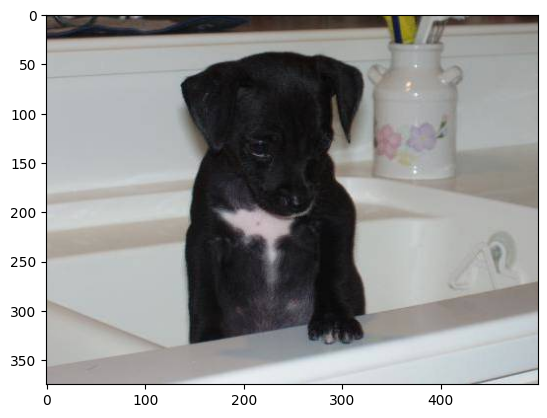

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

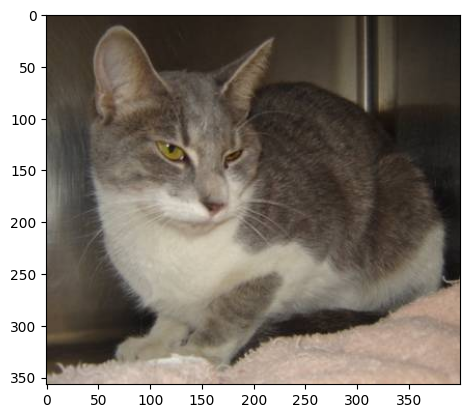

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
cat
cat
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

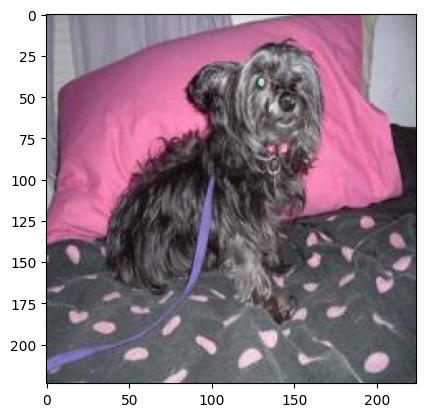

In [19]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.0.jpg')
imgplt = plt.imshow(img)
plt.show()

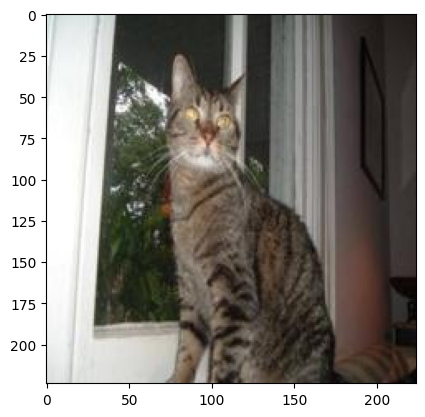

In [21]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4354.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [22]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [23]:
print(filenames[0:5])
print(len(filenames))

['cat.9190.jpg', 'dog.10895.jpg', 'cat.3403.jpg', 'cat.630.jpg', 'dog.7147.jpg']
2000


In [24]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [25]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


Converting all the resized images to numpy arrays

In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [197 201 189]
   [196 200 188]
   [196 200 188]]

  [[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [197 201 189]
   [196 200 188]
   [196 200 188]]

  [[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [196 200 188]
   [196 200 188]
   [196 200 188]]

  ...

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [174 182 199]
   [173 181 198]
   [173 181 198]]

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [176 185 199]
   [176 185 199]
   [176 185 199]]

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [181 190 204]
   [180 189 203]
   [180 189 203]]]


 [[[139 151 193]
   [129 141 183]
   [139 151 193]
   ...
   [235 223 221]
   [240 228 226]
   [248 236 234]]

  [[145 157 199]
   [128 140 182]
   [131 143 185]
   ...
   [233 221 219]
   [238 226 224]
   [246 234 232]]

  [[146 158 200]
   [123 135 177]
   [119 131 173]
   ...
   [236 224 222]
   [241 229 227]
   [249 237

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [31]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [34]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  [[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  [[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  ...

  [[0.59215686 0.61960784 0.67843137]
   [0.54901961 0.58039216 0.63137255]
   [0.57647059 0.60392157 0.6627451 ]
   ...
   [0.58823529 0.64313725 0.71372549]
   [0.58823529 0.64313725 0.71372549]
   [0.58431373 0.63921569 0.70980392]]

  [[0.60392157 0.63529412 0.68627451]
   [0.5

**Building the Neural Network**

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 62s 1s/step - loss: 0.1838 - acc: 0.9300
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0669 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0492 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0380 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.0373 - acc: 0.9862


In [41]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.0627 - acc: 0.9825
Test Loss = 0.06270164251327515
Test Accuracy = 0.9825000166893005


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


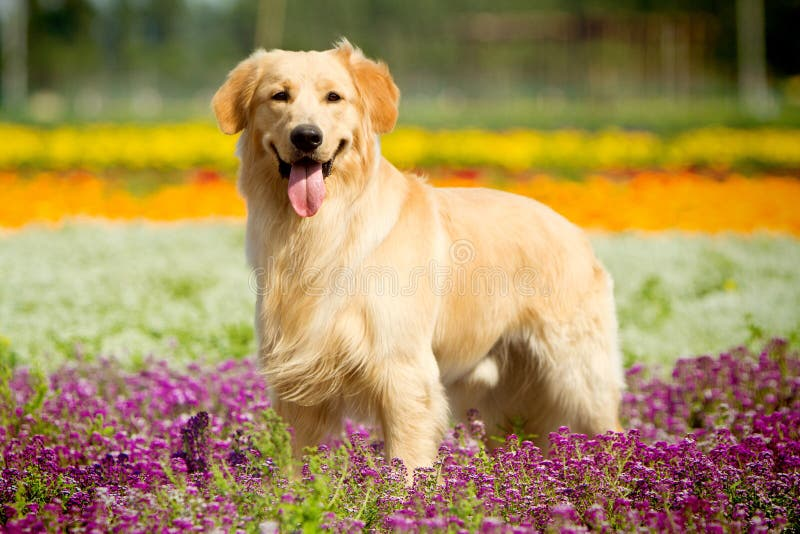

1/1 [==============================] - 1s 1s/step
[[-3.0936098  4.290327 ]]
1
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


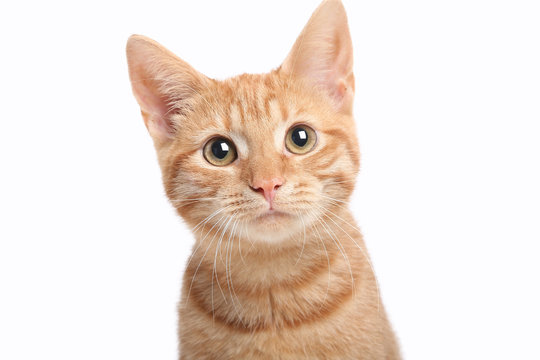

1/1 [==============================] - 0s 55ms/step
[[ 4.4876633 -4.456823 ]]
0
The image represents a Cat


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')